In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole

from spyrmsd.io import to_molecule
from spyrmsd.graph import match_graphs

import numpy as np
from collections import defaultdict

In [2]:
rdmol = Chem.MolFromSmiles("CC(C)(O)C")

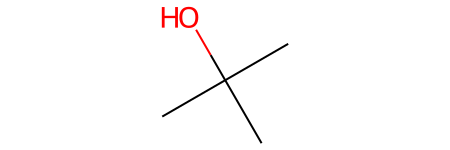

In [3]:
rdmol

In [4]:
# spyrmsd works with 3D coordinates
# generate conformer
rdmol = Chem.AddHs(rdmol)
Chem.EmbedMolecule(rdmol)

0

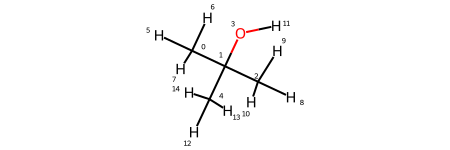

In [5]:
IPythonConsole.drawOptions.addAtomIndices = True
rdmol.Compute2DCoords()
rdmol

In [6]:
mol = to_molecule(rdmol, adjacency=True)

In [7]:
mol.atomicnums

array([6, 6, 6, 8, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
G = mol.to_graph()

In [9]:
matches = match_graphs(G, G)
matches

[([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]),
 ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 13],
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]),
 ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 12, 14],
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]),
 ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 12],
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]),
 ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 12, 13],
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]),
 ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 13, 12],
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]),
 ([0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 9, 11, 12, 13, 14],
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]),
 ([0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 9, 11, 12, 14, 13],
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]),
 ([0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 9, 11, 13, 12, 14],
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]),
 ([0, 1, 2, 3, 4, 5

In [10]:
matches[-1]

([4, 1, 2, 3, 0, 14, 13, 12, 10, 9, 8, 11, 7, 6, 5],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [11]:
equivalent_atoms = defaultdict(set)
for t1, t2 in matches:
    t1 = np.array(t1)
    t2 = np.array(t2)
        
    for atomicnum in np.unique(mol.atomicnums):
        mask = mol.atomicnums == atomicnum
        
        # Indices of atoms that changed position
        idxs = np.nonzero(t1-t2)[0]   
        
        # Index the atomic number mask
        M = mask[idxs]

        # Extract only indices corresponding to current atomic number
        idxs_atomicnum = idxs[M]
                
        if len(idxs_atomicnum) > 0:
            for idx in idxs_atomicnum:
                equivalent_atoms[atomicnum].add(idx)

In [12]:
equivalent_atoms

defaultdict(set, {1: {5, 6, 7, 8, 9, 10, 12, 13, 14}, 6: {0, 2, 4}})